## Imports:


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import contextily
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy.geocoders import Nominatim
from tqdm import tqdm 
from decimal import *
import seaborn as sns


### Open the litterati Database:

In [24]:
litter = pd.read_csv('USA OpenData Report Litterati.csv')
print(litter['Location'])

0          (-122.134176521,37.401654278)
1          (-122.134317937,37.401561979)
2          (-122.134848444,37.401673876)
3          (-122.134343237,37.399733858)
4          (-122.134468295,37.399795591)
                       ...              
1877600    (-122.268333435,37.867202758)
1877601    (-118.467994689,33.995864868)
1877602                (-97.4275,32.694)
1877603             (-97.42834,32.69316)
1877604        (-110.9632514,32.2797253)
Name: Location, Length: 1877605, dtype: object


## Functions getX(str) and getY(str)
### The functions take a string of the sort str = ('42.1889634352895/-71.8448098585561')
### getX gets rid of the parenthesis '()' and takes numbers until it reaches a comma ','
### returns: a string reprisenting Latitude 

In [25]:
def getX(str):
    
    x = ''
    for c in str:
        if (c == '('):
            continue
        elif (c == ','):
            break
        else:
            x += c
    return (x)

s = "(-97.4279,32.696)"
x = getX(s)
print(x)
print(type(x))
#float

-97.4279
<class 'str'>


### getY gets rid of the parenthesis '()' and takes the numbers after it reaches a comma ','
### returns: a string reprisenting Longitude 

In [26]:
def getY(str):
    
    y = ''
    start = False
    for c in str:
        if(c == ','):
            start = True
            continue
        elif(start == True):
            if ((c != '(') & (c != ')')):
                y += c
                
            
    return (y)
st = "(-122.134176521,37.401654278)"
y = getY(st)
print(y)
print(type(y))



37.401654278
<class 'str'>


In [27]:
def getStr(str):
    x = ''
    for c in str:
        if ((c == '(') | (c == ')')):
            continue
        else:
            if(c == ','):
                x += c
                x += ' '
                continue
            x += c
    return x

s = "(-93.9228440915178,29.9566605873685)"
x = getStr(s)
print(x)
print(type(x))



-93.9228440915178, 29.9566605873685
<class 'str'>


## Subset results to only show entries in 2020
### Open US map polygons
### I am also subsetting to find the different kinds of Unique Tags that there are in the DataSet. There's A LOT


In [28]:
allL = litter[(litter["Date"] > "2020") & (litter["Date"] <"2021")]
usa = gpd.read_file("/Users/ivanstoykov/Desktop/CDS 490/states_21basic/states.shp")
poly = usa[usa.STATE_ABBR == 'NY'].geometry
#VT = allL[allL["Location"] ] 

In [29]:
unique_labels = allL.drop_duplicates(subset = ["Tags"])
unique_labels


,Litter,Tags,Location,Country,Date
58,9198504,{NULL},"(-122.380437821764,47.8054819900322)",US,2020-10-16 07:05:17+05
412,9197819,"{plastic,wrapper}","(-93.9228440915178,29.9566605873685)",US,2020-10-16 04:45:25+05
414,9197816,"{plastic,popsicle}","(-93.9228244778644,29.9566577794309)",US,2020-10-16 04:44:58+05
415,9197818,"{facemask,paper}","(-93.9227397368233,29.9566832604166)",US,2020-10-16 04:44:48+05
416,9197817,"{piece,plastic}","(-93.9227049519251,29.9566462124046)",US,2020-10-16 04:44:46+05
...,...,...,...,...,...
699880,4877415,"{maruchan,plastic}","(-121.95066167,37.3273)",US,2020-01-01 04:31:52+05
699881,4877419,"{candy,lindt,plastic}","(-121.95070000000001,37.327283329999986)",US,2020-01-01 04:31:48+05
700089,4867655,{plasticcigarettefilter},"(-122.49719009154308,37.919129410849926)",US,2020-01-01 02:21:10+05
700137,4867609,{shotgun wad},"(-122.4971796599179,37.9191204357432)",US,2020-01-01 02:13:19+05


### Here I create a new Dataframe that contains:
#### X and Y coordinates that are string types
#### Date string from the litterati dataset
#### Tags string containing plastic tags

In [30]:
# Make an array containing the location column
loc2020 = pd.array(allL['Location'])
tags = pd.array(allL['Tags'])
date = pd.array(allL['Date'])

latitude = []
longitude = []
counter = 0

for i in loc2020:
    
    latitude.append(getX(i))
    longitude.append(getY(i))

    counter += 1
    
    # Example Dataframe with coordinates, dates, tags
    # header[0] = 'X', header[1] = 'Y' 
    
dict = {"Date": date,"Tags": tags ,"X" : latitude, "Y" : longitude}
df = pd.DataFrame(dict)
df

,Date,Tags,X,Y
0,2020-10-16 07:05:17+05,{NULL},-122.380437821764,47.8054819900322
1,2020-10-16 06:58:42+05,{NULL},-122.380178001756,47.8030983923444
2,2020-10-16 06:42:08+05,{NULL},-124.207252347958,40.7826304575808
3,2020-10-16 06:40:07+05,{NULL},-121.97147640411,47.5892149424624
4,2020-10-16 06:39:58+05,{NULL},-121.971394848192,47.5892389147054
...,...,...,...,...
700187,2020-01-01 00:13:53+05,{NULL},-123.26880171760158,44.110060478419484
700188,2020-01-01 00:13:49+05,{NULL},-123.27158395099289,44.10809131965569
700189,2020-01-01 00:12:50+05,{NULL},-123.2698316842854,44.11009008901154
700190,2020-01-01 00:12:47+05,{NULL},-123.26915269480813,44.109999388955785


### Here I am iterating through the new df dataframe and creating a point from each
### set of coordinates and then adding that point to the Point column


points = []
pct = 0
n = 1
for index, row in df.iterrows():

    p1 = Point(row["X"],row["Y"])
    points.append(p1)
    #print("%d: %f,%f" %(index, row["X"], row["Y"]))
    #print(p1)
    #print(type(p1))
    if(index == n*7008):
        n += 1
        pct += 1
        print("Progress: %d %%" %pct)
df['Points'] = points
df

### Adding string coordinates
### strLoc is an array with the coordinate strings formatted like "Y,X" since that is what the Nominatim reverse geolocation class uses. 
### The array is then added to the dataframe as "Loc_str"

In [31]:
strLoc = []

for i in range(len(loc2020)):
    
    #strLoc.append(getStr(loc2020[i]))
    #print(getStr(loc2020[i]))
    strng = ("%s, %s" %(getY(loc2020[i]), getX(loc2020[i])))
    strLoc.append(strng)
    

df["Loc_str"] = strLoc
df



,Date,Tags,X,Y,Loc_str
0,2020-10-16 07:05:17+05,{NULL},-122.380437821764,47.8054819900322,"47.8054819900322, -122.380437821764"
1,2020-10-16 06:58:42+05,{NULL},-122.380178001756,47.8030983923444,"47.8030983923444, -122.380178001756"
2,2020-10-16 06:42:08+05,{NULL},-124.207252347958,40.7826304575808,"40.7826304575808, -124.207252347958"
3,2020-10-16 06:40:07+05,{NULL},-121.97147640411,47.5892149424624,"47.5892149424624, -121.97147640411"
4,2020-10-16 06:39:58+05,{NULL},-121.971394848192,47.5892389147054,"47.5892389147054, -121.971394848192"
...,...,...,...,...,...
700187,2020-01-01 00:13:53+05,{NULL},-123.26880171760158,44.110060478419484,"44.110060478419484, -123.26880171760158"
700188,2020-01-01 00:13:49+05,{NULL},-123.27158395099289,44.10809131965569,"44.10809131965569, -123.27158395099289"
700189,2020-01-01 00:12:50+05,{NULL},-123.2698316842854,44.11009008901154,"44.11009008901154, -123.2698316842854"
700190,2020-01-01 00:12:47+05,{NULL},-123.26915269480813,44.109999388955785,"44.109999388955785, -123.26915269480813"


## How to get street address:

geolocator = Nominatim(user_agent = "GMU")
addressLine = []

#Only go through first 20 because it takes forever.

for i in range(20):
    
    l = geolocator.reverse(strLoc[i])
    addressLine.append(l)
    print(l.address)
    

### Save df to csv

In [33]:
#Save the combined dataframe as "df.csv"
df.to_csv( "/Users/ivanstoykov/Desktop/CDS 490 Repository/ocean-plastics/pipeline/litterati/litToEc/df.csv", index="False")


### Open df from csv

In [34]:
#df = pd.read_csv('df.csv')


### Create in_NY which finds out whether datapoint is in the state of New York

In [35]:
points = []
in_NY = []
pct = 0
n = 1
for index, row in df.iterrows():

    p = Point(Decimal(latitude[index]), Decimal(longitude[index]))
    points.append(p)
    
    in_NY.append(poly.contains(p).bool())
    
    #print(p.within(poly))
    #print(poly.contains(p).bool())
    #print(type(poly.contains(p).bool()))

    if(index == n*7002):
        n += 1
        pct += 1
        print("Progress: %d %%" %pct)
        
df["in_NY"] = in_NY
df



Progress: 1 %
Progress: 2 %
Progress: 3 %
Progress: 4 %
Progress: 5 %
Progress: 6 %
Progress: 7 %
Progress: 8 %
Progress: 9 %
Progress: 10 %
Progress: 11 %
Progress: 12 %
Progress: 13 %
Progress: 14 %
Progress: 15 %
Progress: 16 %
Progress: 17 %
Progress: 18 %
Progress: 19 %
Progress: 20 %
Progress: 21 %
Progress: 22 %
Progress: 23 %
Progress: 24 %
Progress: 25 %
Progress: 26 %
Progress: 27 %
Progress: 28 %
Progress: 29 %
Progress: 30 %
Progress: 31 %
Progress: 32 %
Progress: 33 %
Progress: 34 %
Progress: 35 %
Progress: 36 %
Progress: 37 %
Progress: 38 %
Progress: 39 %
Progress: 40 %
Progress: 41 %
Progress: 42 %
Progress: 43 %
Progress: 44 %
Progress: 45 %
Progress: 46 %
Progress: 47 %
Progress: 48 %
Progress: 49 %
Progress: 50 %
Progress: 51 %
Progress: 52 %
Progress: 53 %
Progress: 54 %
Progress: 55 %
Progress: 56 %
Progress: 57 %
Progress: 58 %
Progress: 59 %
Progress: 60 %
Progress: 61 %
Progress: 62 %
Progress: 63 %
Progress: 64 %
Progress: 65 %
Progress: 66 %
Progress: 67 %
Prog

,Date,Tags,X,Y,Loc_str,in_NY
0,2020-10-16 07:05:17+05,{NULL},-122.380437821764,47.8054819900322,"47.8054819900322, -122.380437821764",False
1,2020-10-16 06:58:42+05,{NULL},-122.380178001756,47.8030983923444,"47.8030983923444, -122.380178001756",False
2,2020-10-16 06:42:08+05,{NULL},-124.207252347958,40.7826304575808,"40.7826304575808, -124.207252347958",False
3,2020-10-16 06:40:07+05,{NULL},-121.97147640411,47.5892149424624,"47.5892149424624, -121.97147640411",False
4,2020-10-16 06:39:58+05,{NULL},-121.971394848192,47.5892389147054,"47.5892389147054, -121.971394848192",False
...,...,...,...,...,...,...
700187,2020-01-01 00:13:53+05,{NULL},-123.26880171760158,44.110060478419484,"44.110060478419484, -123.26880171760158",False
700188,2020-01-01 00:13:49+05,{NULL},-123.27158395099289,44.10809131965569,"44.10809131965569, -123.27158395099289",False
700189,2020-01-01 00:12:50+05,{NULL},-123.2698316842854,44.11009008901154,"44.11009008901154, -123.2698316842854",False
700190,2020-01-01 00:12:47+05,{NULL},-123.26915269480813,44.109999388955785,"44.109999388955785, -123.26915269480813",False


### 

In [36]:
NY_lit = df[df["in_NY"] == True ]
NY_lit


,Date,Tags,X,Y,Loc_str,in_NY
1677,2020-10-16 00:14:22+05,{NULL},-73.8676488,40.8544771,"40.8544771, -73.8676488",True
2346,2020-10-15 20:02:48+05,{NULL},-73.7683789603993,41.1078849733978,"41.1078849733978, -73.7683789603993",True
2347,2020-10-15 20:02:46+05,{NULL},-73.7682208456778,41.1076876333655,"41.1076876333655, -73.7682208456778",True
2348,2020-10-15 20:02:43+05,{NULL},-73.7682210670989,41.1076855453527,"41.1076855453527, -73.7682210670989",True
2350,2020-10-15 20:02:41+05,{NULL},-73.768318722327,41.1077096241703,"41.1077096241703, -73.768318722327",True
...,...,...,...,...,...,...
699085,2020-01-03 00:56:56+05,{NULL},-73.36007466546573,40.74510375507245,"40.74510375507245, -73.36007466546573",True
699086,2020-01-03 00:56:24+05,{NULL},-73.36019779562332,40.745168631003,"40.745168631003, -73.36019779562332",True
699087,2020-01-03 00:56:18+05,{NULL},-73.360183714026,40.745159955733214,"40.745159955733214, -73.360183714026",True
699088,2020-01-03 00:55:55+05,{NULL},-73.35986398319379,40.74500352889903,"40.74500352889903, -73.35986398319379",True


### Below we will separate all the unique tags from the NY dataset, and create a new column "is_plastic" depending on whether the piece of trash is considered plastic


In [37]:
unique_labels = NY_lit.drop_duplicates(subset = ["Tags"])
NY_pl_lab = []

for index, row in unique_labels.iterrows():
    
    print(row[1])
    if "plastic" in row[1]: 
        NY_pl_lab.append(row[1])
        


{NULL}
{fungi,mushroom}
{bag}
{piece,plastic,wrapper}
{plastic}
{tissue}
{wrapper}
{piece}
{styrofoam}
{paper,piece}
{paper}
{bottle,cup,plastic}
{plastic,wrapper}
{polystyrene,styrofoam}
{oreo,plastic}
{polystyrene}
{bottle,plastic}
{aluminum,can,metal}
{candy,paper,tropicana}
{jack links,plastic,wrapper}
{bottlecap,plastic}
{rubber}
{bag,innout,plastic,wrapper}
{cigarette}
{cardboard}
{ricekrispies}
{napkin,paper}
{metal}
{paper,plastic}
{cup,mcdonalds,plastic}
{cup,plastic,starbucks}
{bag,plastic,wrapper}
{bag,plastic}
{candy,plastic}
{coke,cup,drink}
{miscellaneous}
{glove,plastic}
{plastic,sealed air}
{cup,paper}
{bottle}
{can,drink,metal}
{dentalfloss,floss,glidefloss,plastic}
{aluminum,can}
{propane tank,steel}
{cup,papercup}
{newspaper}
{laundry detergent,plastic}
{flowerpot,plastic}
{plastic,plasticjug}
{paperplate}
{papercup}
{lid,plastic}
{beer}
{can}
{brokenglass,glass,glassshard,metal}
{bottle,plastic,poland spring}
{bottle,polandspring}
{cd,plastic}
{cup,plastic}
{knetter

In [38]:
NY_pl_lab

is_plastic = lambda x: x in NY_pl_lab
boollist = NY_lit["Tags"].apply(is_plastic)
NY_lit["is_plastic"] = boollist
#vermont_lit["Tags"].apply(is_plastic) 

<ipython-input-38-98c3bdbbbd24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_lit["is_plastic"] = boollist


In [39]:
NY_lit


,Date,Tags,X,Y,Loc_str,in_NY,is_plastic
1677,2020-10-16 00:14:22+05,{NULL},-73.8676488,40.8544771,"40.8544771, -73.8676488",True,False
2346,2020-10-15 20:02:48+05,{NULL},-73.7683789603993,41.1078849733978,"41.1078849733978, -73.7683789603993",True,False
2347,2020-10-15 20:02:46+05,{NULL},-73.7682208456778,41.1076876333655,"41.1076876333655, -73.7682208456778",True,False
2348,2020-10-15 20:02:43+05,{NULL},-73.7682210670989,41.1076855453527,"41.1076855453527, -73.7682210670989",True,False
2350,2020-10-15 20:02:41+05,{NULL},-73.768318722327,41.1077096241703,"41.1077096241703, -73.768318722327",True,False
...,...,...,...,...,...,...,...
699085,2020-01-03 00:56:56+05,{NULL},-73.36007466546573,40.74510375507245,"40.74510375507245, -73.36007466546573",True,False
699086,2020-01-03 00:56:24+05,{NULL},-73.36019779562332,40.745168631003,"40.745168631003, -73.36019779562332",True,False
699087,2020-01-03 00:56:18+05,{NULL},-73.360183714026,40.745159955733214,"40.745159955733214, -73.360183714026",True,False
699088,2020-01-03 00:55:55+05,{NULL},-73.35986398319379,40.74500352889903,"40.74500352889903, -73.35986398319379",True,False


<AxesSubplot:>

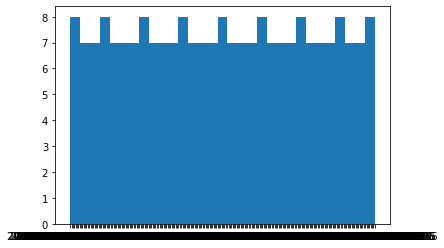

In [40]:
#Help with plots jboone@gmu.edu

Jan = NY_lit[(NY_lit["Date"] > "2020-01-01") & (NY_lit["Date"] < "2020-02-01")]
Feb = NY_lit[(NY_lit["Date"] > "2020-02-01") & (NY_lit["Date"] < "2020-03-01")]
Mar = NY_lit[(NY_lit["Date"] > "2020-03-01") & (NY_lit["Date"] < "2020-04-01")]
Apr = NY_lit[(NY_lit["Date"] > "2020-04-01") & (NY_lit["Date"] < "2020-05-01")]
May = NY_lit[(NY_lit["Date"] > "2020-05-01") & (NY_lit["Date"] < "2020-06-01")]
Jun = NY_lit[(NY_lit["Date"] > "2020-06-01") & (NY_lit["Date"] < "2020-07-01")]
Jul = NY_lit[(NY_lit["Date"] > "2020-07-01") & (NY_lit["Date"] < "2020-08-01")]
Aug = NY_lit[(NY_lit["Date"] > "2020-08-01") & (NY_lit["Date"] < "2020-09-01")]
Sep = NY_lit[(NY_lit["Date"] > "2020-09-01") & (NY_lit["Date"] < "2020-10-01")]
Oct = NY_lit[(NY_lit["Date"] > "2020-10-01") & (NY_lit["Date"] < "2020-11-01")]

#sns.distplot(NY_lit['Date'])
#gapminder['lifeExp'].hist(bins=100)
#sns.distplot(gapminder['lifeExp'], kde=False, color='red', bins=100)
Aug['Date'].hist(bins = 31, grid = False)




In [41]:
NY_lit.index = pd.to_datetime(NY_lit["Date"])
NY_ag["sum"] = NY_ag["is_plastic"].apply(np.sum, axis=0)
NY_ag["count"] = NY_ag["is_plastic"].apply(np.count, axis=0)

NY_ag["pct"] = 100 * NY_ag["is_plastic","sum"]/NY_ag["is_plastic","count"]
NY_ag["count-sum"] = pd.array(NY_ag["count"])- pd.array(NY_ag["sum"]) 

NY_ag



NameError: name 'NY_ag' is not defined

In [ ]:
NY_ag["is_plastic"].apply(np.sum, axis=1)


In [ ]:
NY_ag = NY_lit.groupby(pd.Grouper(freq = "M")).agg({
    "is_plastic":["sum", "count"]
})
